# Rank Sweep Plot
This notebook plots all of the results from the rank sweep project.

# Code

In [1]:
from plot_code import *
import csv

In [42]:
# Plot convergance
def plot_convergance(plot_name, parameter_name, parameters, xids, pid, save_directory, filetype, lambda_scalar):
    if len(parameters) != len(xids): raise ValueError("Parameters and xids must be of same length")
    
    for xid in xids: check_training_progress(xid, pid)
    
    for i, xid in enumerate(xids):
        if not os.path.isdir(os.path.join(results_directory, str(xid), str(pid))): continue

        dist = load_data(xid, pid, 'dist')
        style = '-'
        label = parameter_name + ' ' + str(parameters[i])
        
        if lambda_scalar and float(parameters[i]) != 0: 
            dist *= 1/(2*float(parameters[i]))
        dist = dist[:num_checkpoints] # truncate in case length exceeds max
        epochs = epochs_full[:len(dist)] # truncate in case not finished training
        plt.errorbar(epochs, dist, label=label, color=cmap(i), linestyle=style)

        plt.xlim(1,num_checkpoints*save_skip)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel('Epoch', fontsize=15)
        plt.ylabel('Dist', fontsize=15)
        plt.legend(loc='upper right', prop={'size': 6})
        plt.semilogy()
            
    filename = "dist_" + plot_name + "_" + parameter_name.replace(" ", "_") + "." + filetype
    plt.savefig(os.path.join(save_directory, filename))
    plt.show()

In [35]:
def import_csv(filepath):
    with open(filepath, newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.DictReader(csvfile)
        rows = []
        for row in reader:
            rows.append(row)
    return rows

def find_matching_xids(**kwargs):
    rows = import_csv('../experiments.csv')
    xids = []
    for row in rows:
        match = True
        for param, value in kwargs.items():
            if str(row[param]).replace('.','',1).isdigit():
                row[param] = str(float(row[param]))
            if str(value).replace('.','',1).isdigit():
                value = str(float(value))
            
            if str(row[param]).lower() != str(value).lower():
                match = False
                break
        if match:
            xids.append(row['xid'])
    return xids

def find_free_params(xids):
    rows = import_csv('../experiments.csv')
    rows = [row for row in rows if row['xid'] in xids]
    EXCLUDE = ['TIME_NOW', 'xid', 'pid']
    free_params = []
    for row in rows:
        for param, value in row.items():
            if  rows[0][param].lower() != value.lower() and param not in free_params and param not in EXCLUDE:
                free_params.append(param)
    return free_params

def param_plot(rank_max=500, tol=0.001, convergance=False, plot_singvals=False, lambda_scalar=False, **kwargs):
    xids = find_matching_xids(**kwargs)
    free_params = find_free_params(xids)
    experiments = import_csv('../experiments.csv')
    experiments = [row for row in experiments if row['xid'] in xids]
    
    if len(free_params) > 1: raise Exception("Too many free params:", free_params)
    if len(xids) == 0: raise Exception("No experiments match the criteria.")
    
    if convergance:
        plot_convergance(plot_name='',
                         parameter_name=free_params[0],
                         parameters=[experiments[i][free_params[0]] for i in range(len(xids))],
                         xids=xids,
                         pid=0,
                         save_directory='./sweep_figs/',
                         filetype='.pdf',
                         lambda_scalar=lambda_scalar)
    
    plot_all(plot_name='',
             parameter_name=free_params[0],
             parameters=[experiments[i][free_params[0]] for i in range(len(xids))],
             xids=xids,
             pid=0,
             save_directory='./sweep_figs/',
             filetype='.pdf',
             tol=tol,
             rank_max=rank_max,
             plot_singvals=plot_singvals)

In [4]:
def find_top_experiment(**kwargs):
    xids = find_matching_xids(**kwargs)
    experiments = import_csv('../experiments.csv')
    experiments = [row for row in experiments if row['xid'] in xids]
    
    top_params = experiments[0]
    top_acc = load_data(top_params['xid'], 0, 'test_accuracy')[-1]
    for experiment in experiments:
        acc = load_data(experiment['xid'], 0, 'test_accuracy')[-1]
        if acc > top_acc:
            top_params = experiment
            top_acc = acc
    
    train_acc = load_data(top_params['xid'], 0, 'train_accuracy')[-1]
    return top_params, train_acc, top_acc

# Experiments

## large batch size experiments

0


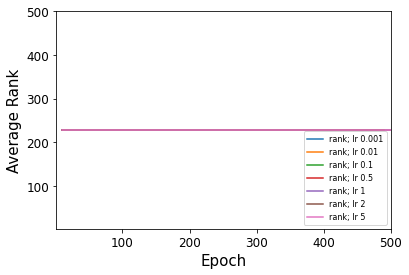

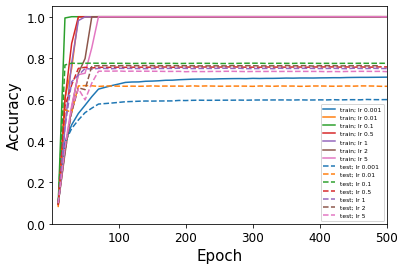

0.0001


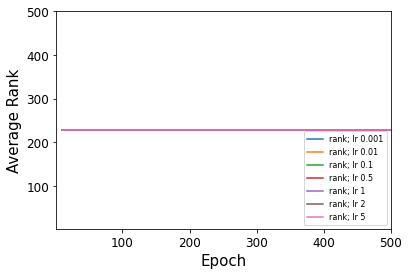

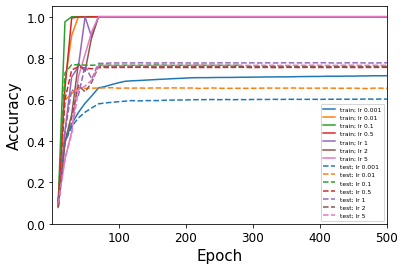

0.0002


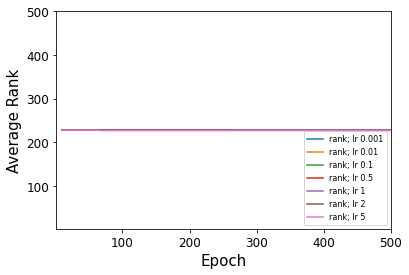

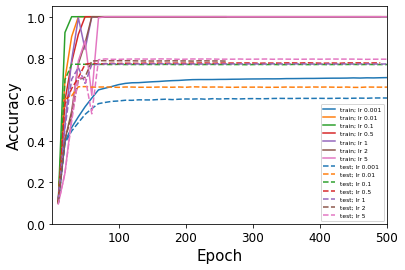

0.0004


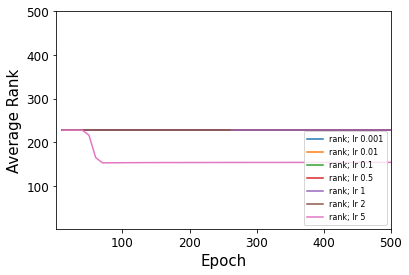

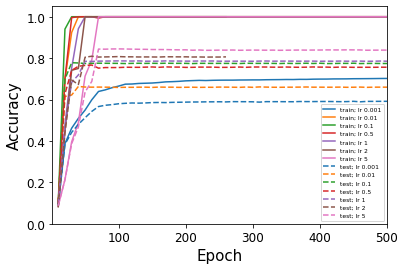

0.0008


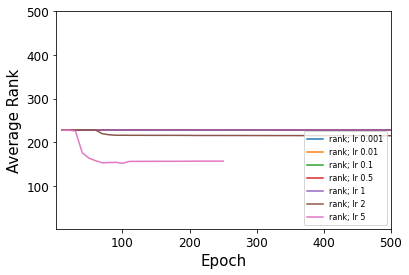

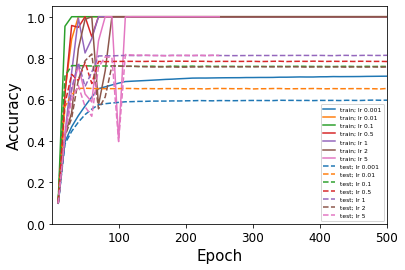

0.006


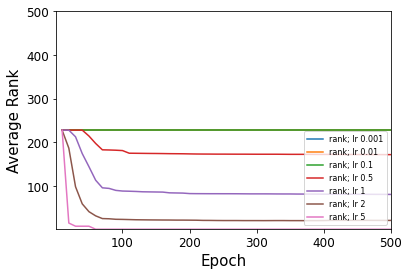

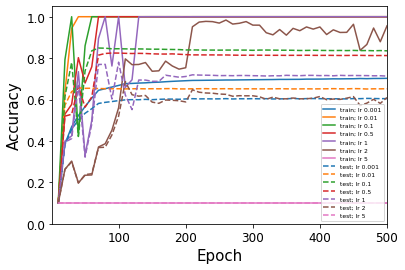

In [32]:
for wd in [0, 1e-4, 2e-4, 4e-4, 8e-4, 6e-3]:
    print(wd)
    param_plot(net='resnet', batch_size=1024, weight_decay=wd)

0.01


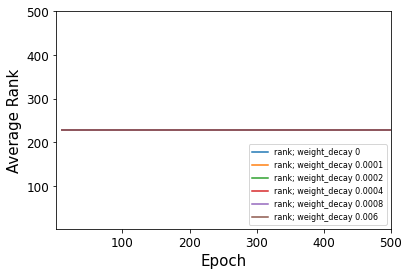

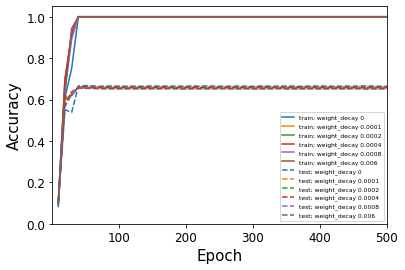

0.1


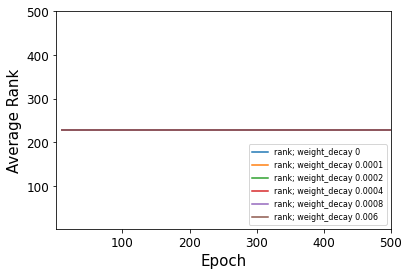

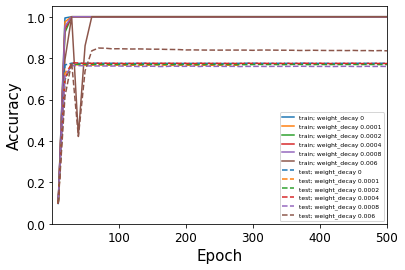

0.5


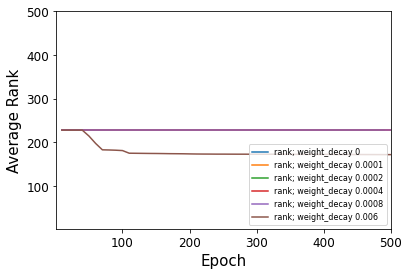

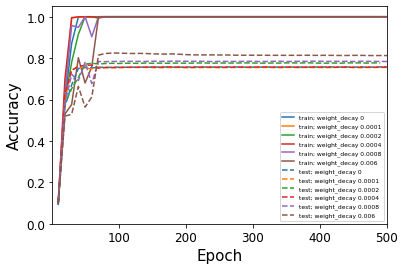

1.0


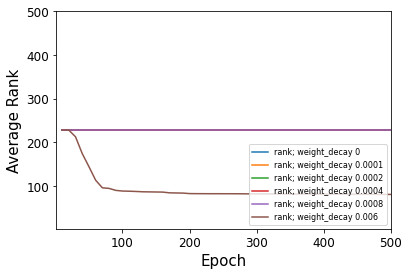

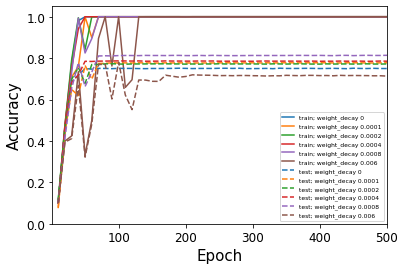

2.0


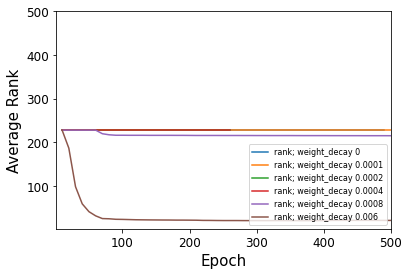

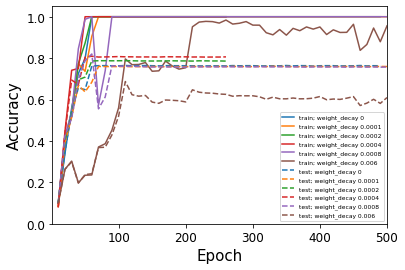

5.0


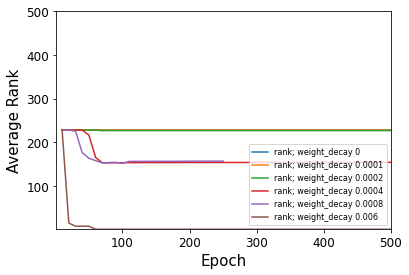

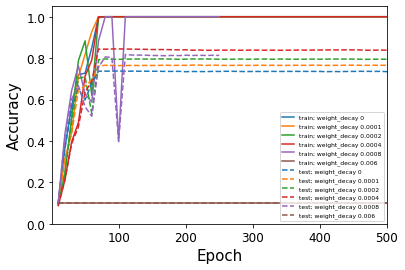

In [31]:
for lr in [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]:
    print(lr)
    param_plot(net='resnet', batch_size=1024, lr=lr)

## Noise Experiments

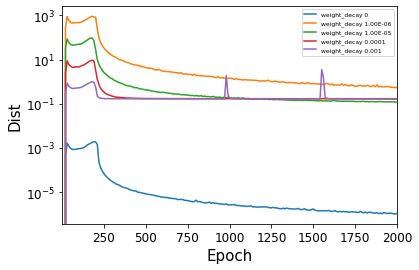

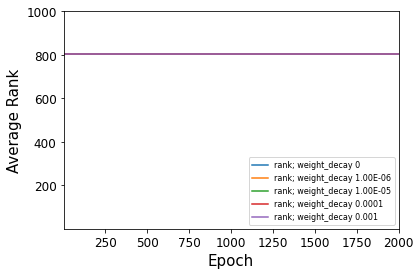

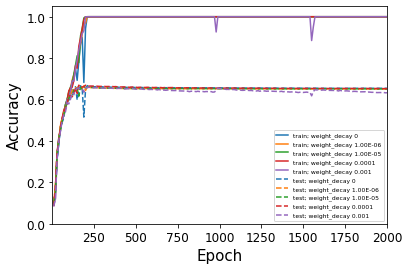

In [43]:
param_plot(net='convnet', 
           loss='CE', 
           lr=0.001, 
           batch_size=128, 
           bn=False, 
           normalize_dist=True, 
           rank_max=1000,
           convergance=True,
           lambda_scalar=True)

lr: 0.001


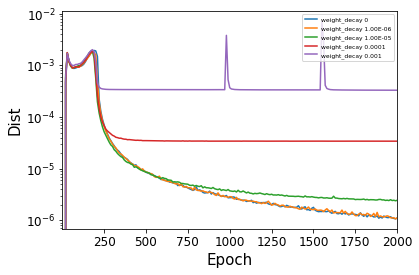

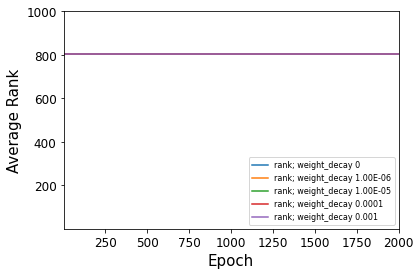

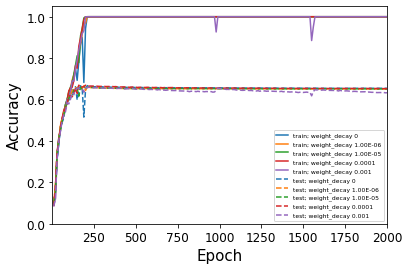

lr: 0.01


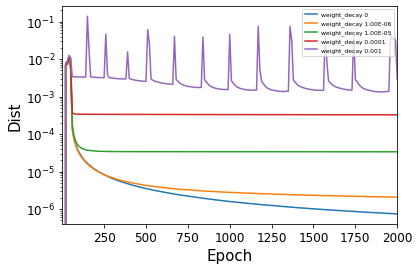

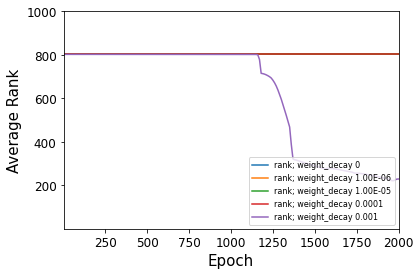

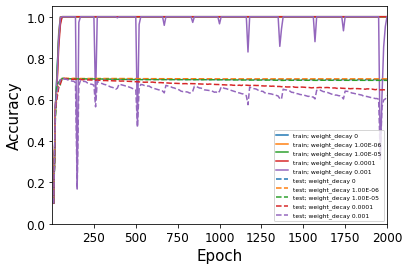

lr: 0.1


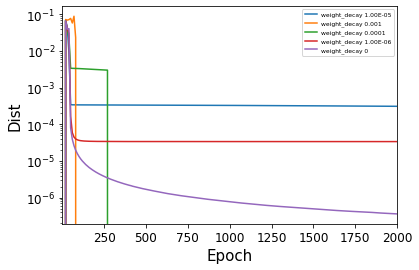

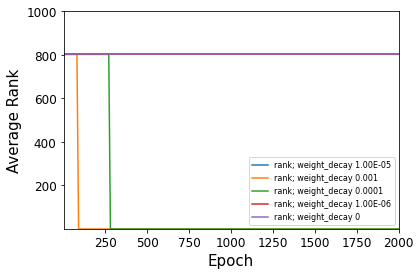

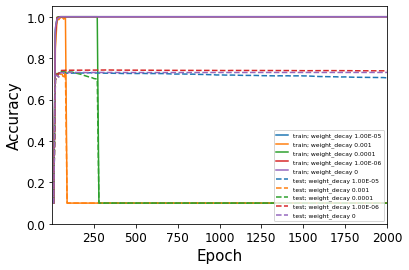

lr: 0.5


/tmp/ipykernel_21113/580457682.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()
/tmp/ipykernel_21113/580457682.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xticks(fontsize=12)


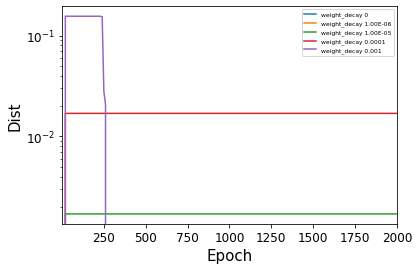

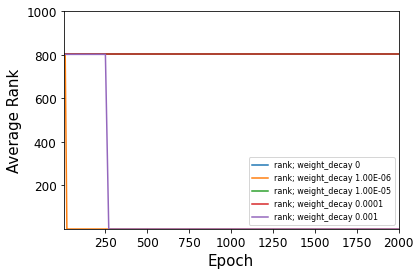

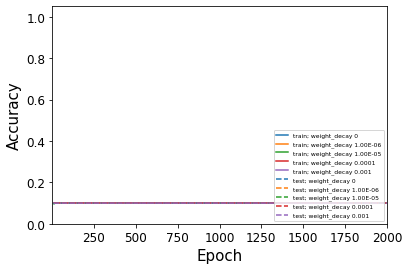

lr: 1.0


/tmp/ipykernel_21113/580457682.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()


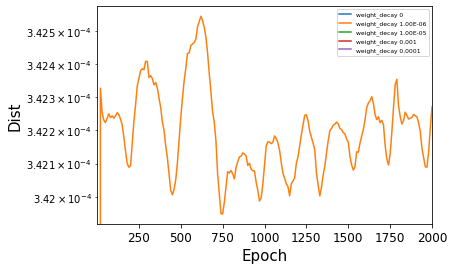

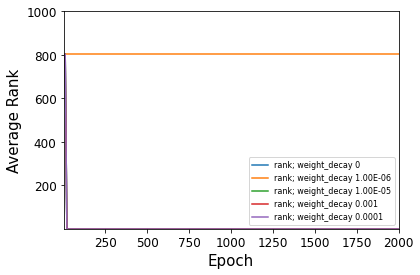

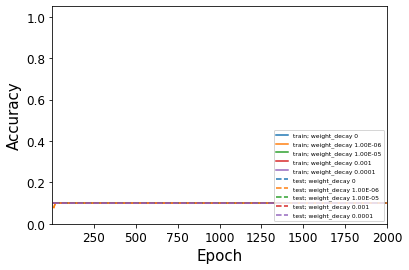

In [6]:
for lr in [0.001, 0.01, 0.1, 0.5, 1.0]:
    print("lr:", lr)
    param_plot(net='convnet', loss='CE', lr=lr, batch_size=128, bn=False, rank_max=1000, normalize_dist=True, convergance=True)

lr: 0.001


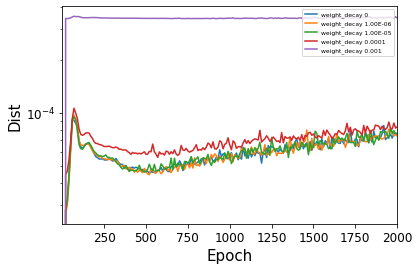

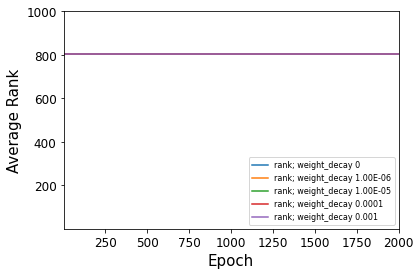

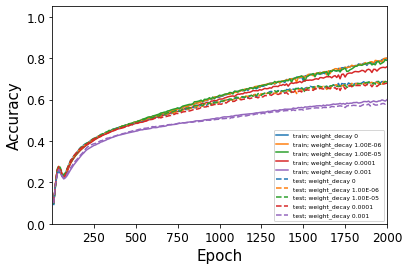

lr: 0.01


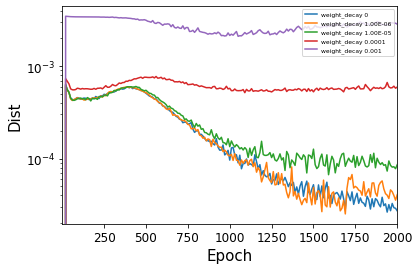

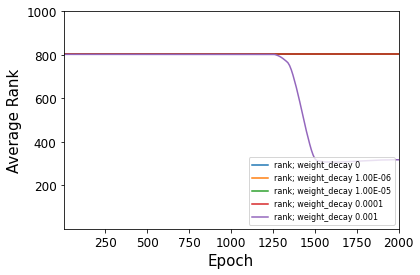

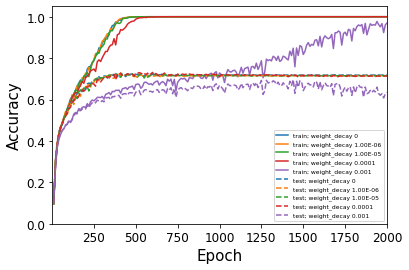

lr: 0.1


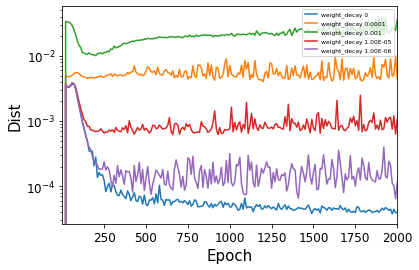

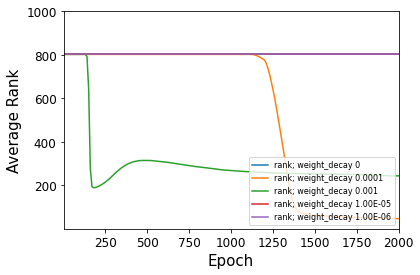

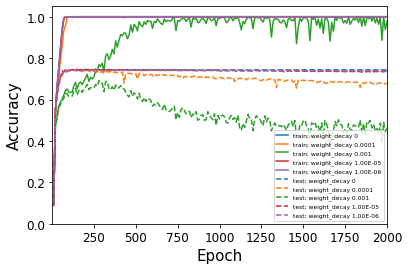

lr: 0.5


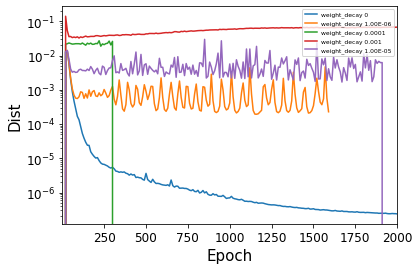

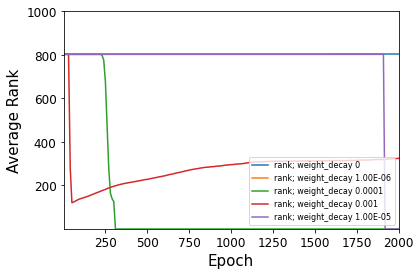

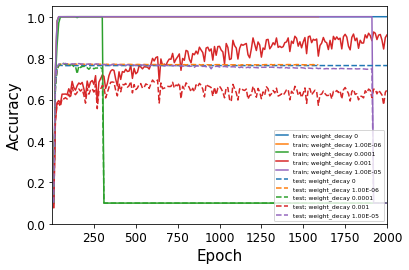

lr: 1.0


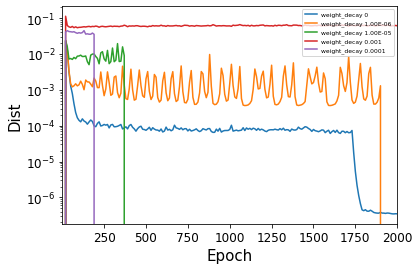

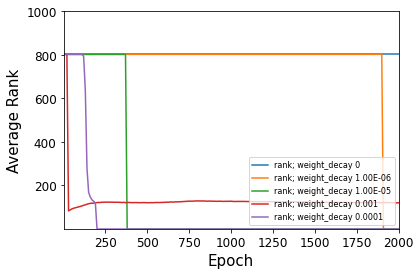

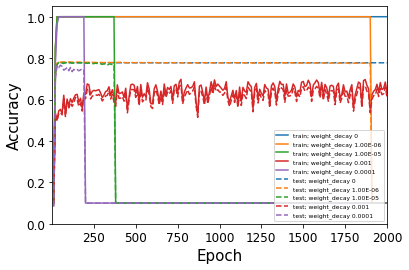

In [7]:
for lr in [0.001, 0.01, 0.1, 0.5, 1.0]:
    print("lr:", lr)
    param_plot(net='convnet', loss='MSE', lr=lr, batch_size=128, bn=False, rank_max=1000, normalize_dist=True, convergance=True)

## Generalization Experiments

## VGG

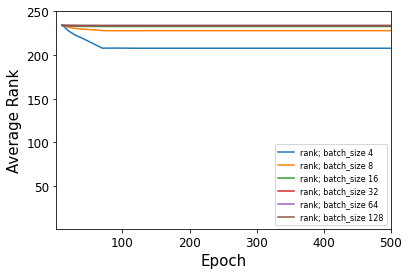

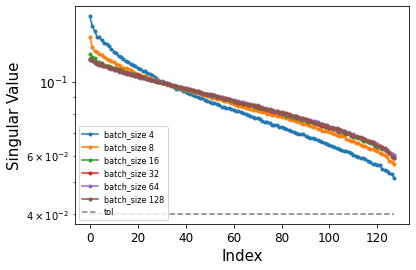

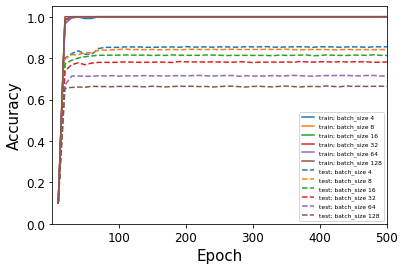

['3069', '3099', '3129', '3159', '3189', '3219']


In [40]:
param_plot(net='vgg', lr=0.001, weight_decay=8e-4, rank_max=250, plot_singvals=True, tol=0.04)
print(find_matching_xids(net='vgg', lr=0.001, weight_decay=8e-4))

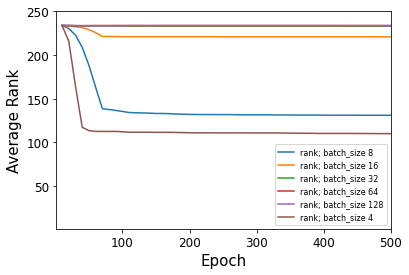

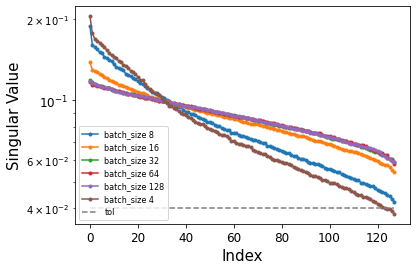

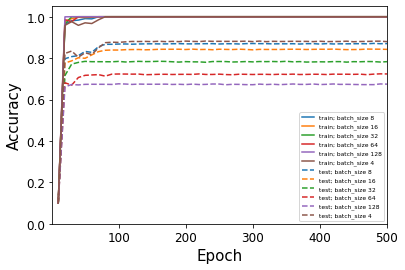

['3100', '3130', '3160', '3190', '3220', '3245']


In [41]:
param_plot(net='vgg', lr=0.001, weight_decay=6e-3, rank_max=250, plot_singvals=True, tol=0.04)
print(find_matching_xids(net='vgg', lr=0.001, weight_decay=6e-3))

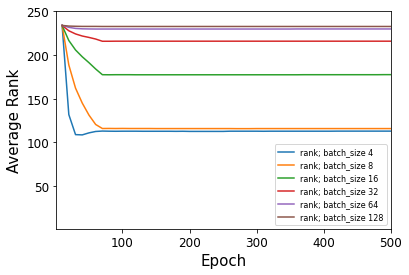

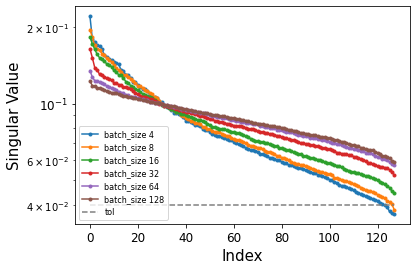

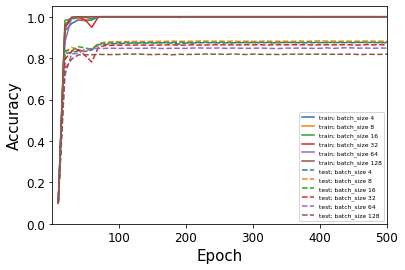

['3074', '3104', '3134', '3164', '3194', '3224']


In [42]:
param_plot(net='vgg', lr=0.01, weight_decay=4e-4, rank_max=250, plot_singvals=True, tol=0.04)
print(find_matching_xids(net='vgg', lr=0.01, weight_decay=4e-4))

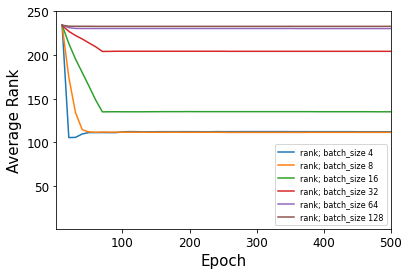

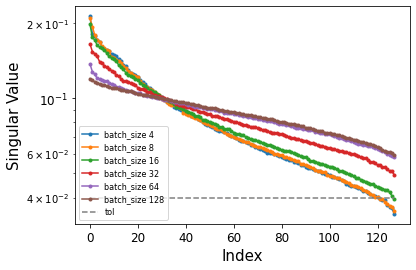

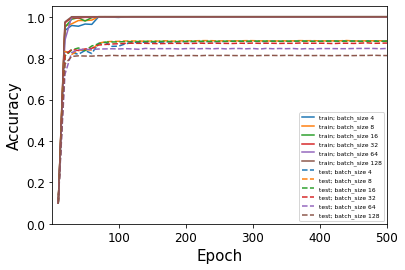

['3075', '3105', '3135', '3165', '3195', '3225']


In [43]:
param_plot(net='vgg', lr=0.01, weight_decay=8e-4, rank_max=250, plot_singvals=True, tol=0.04)
print(find_matching_xids(net='vgg', lr=0.01, weight_decay=8e-4))

## ResNet

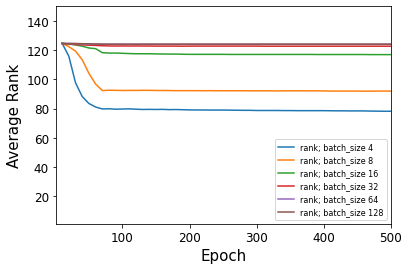

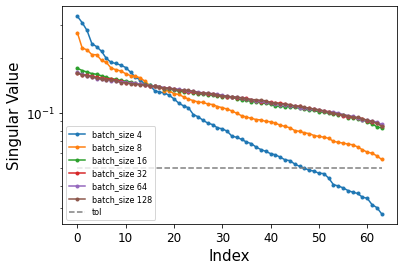

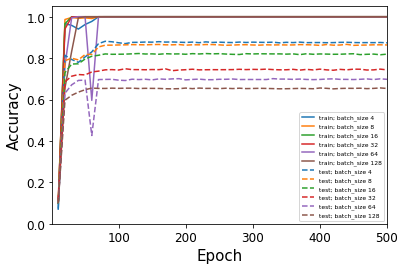

['3253', '3283', '3313', '3343', '3373', '3403']


In [60]:
param_plot(net='resnet', lr=0.001, weight_decay=6e-3, rank_max=150, plot_singvals=True, tol=0.05)
print(find_matching_xids(net='resnet', lr=0.001, weight_decay=6e-3))

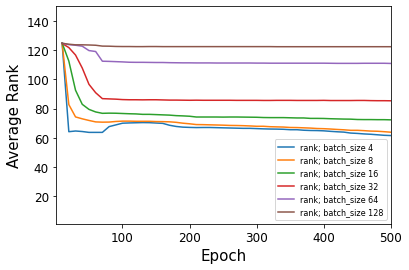

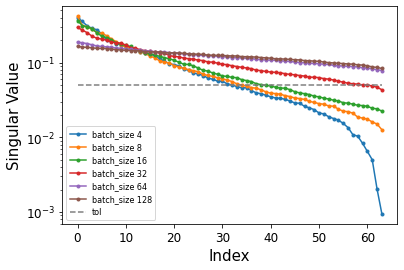

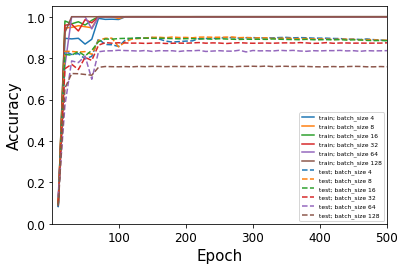

['3798', '3801', '3804', '3807', '3810', '3813']


In [ ]:
param_plot(net='resnet', lr=0.005, weight_decay=6e-3, rank_max=150, plot_singvals=True, tol=0.05)
print(find_matching_xids(net='resnet', lr=0.005, weight_decay=6e-3))

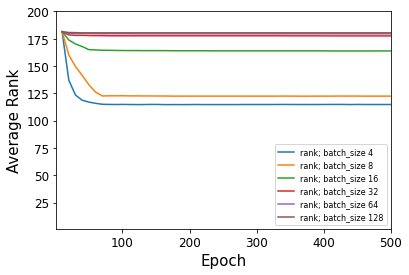

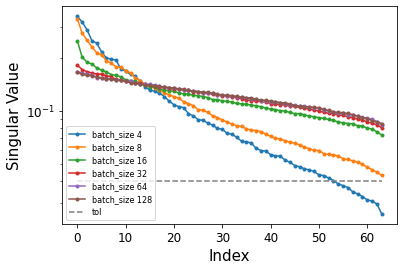

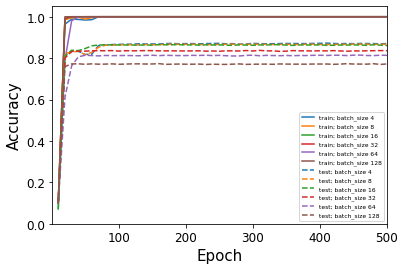

['3257', '3287', '3317', '3347', '3377', '3407']


In [22]:
param_plot(net='resnet', lr=0.01, weight_decay=4e-4, rank_max=200, plot_singvals=True, tol=0.04, width=500)
print(find_matching_xids(net='resnet', lr=0.01, weight_decay=4e-4, width=500))

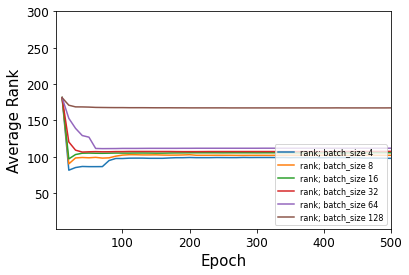

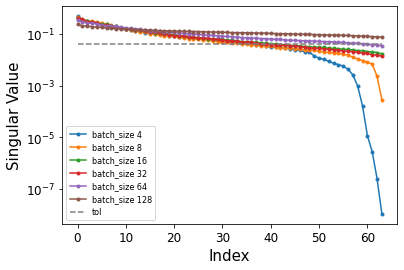

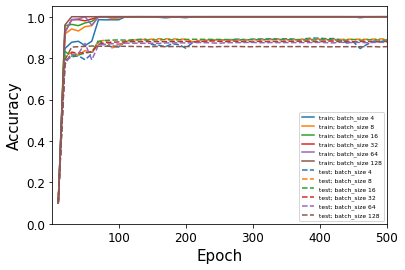

['3263', '3293', '3323', '3353', '3383', '3413']


In [58]:
param_plot(net='resnet', lr=0.1, weight_decay=4e-4, rank_max=300, plot_singvals=True, tol=0.04)
print(find_matching_xids(net='resnet', lr=0.1, weight_decay=4e-4))